<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Hands%20on%20Activity%209.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [1]:
# basic setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
  'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes-1.csv')

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

<ipython-input-8-e42e4afebd86>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quakes_mb.corr(), # for correlation


<Axes: >

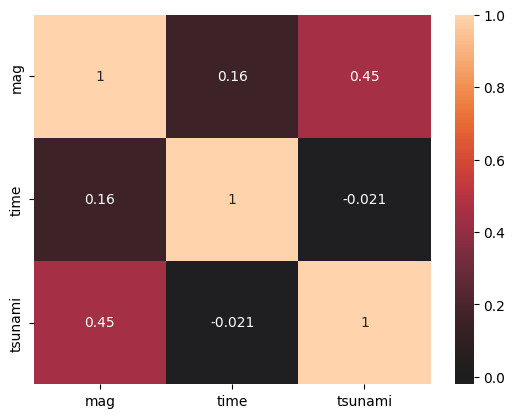

In [8]:
quakes_mb = quakes.query('magType == "mb"') # gets the data points with mb magType
sns.heatmap( # creates a heatmap
  quakes_mb.corr(), # for correlation
  annot=True, center=0
)
# as the correlation between mag and tsunami isn't close to 0,
# there is a high change that there are tsunamis with magType mb

In [9]:
# checking with query() method
quakes.query('magType == "mb" and tsunami == 1').head()

,mag,magType,time,place,tsunami,parsed_place
838,6.1,mb,1539204326420,"132km E of Kimbe, Papua New Guinea",1,Papua New Guinea
1018,5.3,mb,1539150837980,"65km NNW of Lae, Papua New Guinea",1,Papua New Guinea
1406,5.1,mb,1539033346530,"13km E of Palu, Indonesia",1,Indonesia
3112,5.3,mb,1538570285120,"29km SSW of Nggongi, Indonesia",1,Indonesia
3605,5.0,mb,1538456366290,"50km WSW of Kasiguncu, Indonesia",1,Indonesia


Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

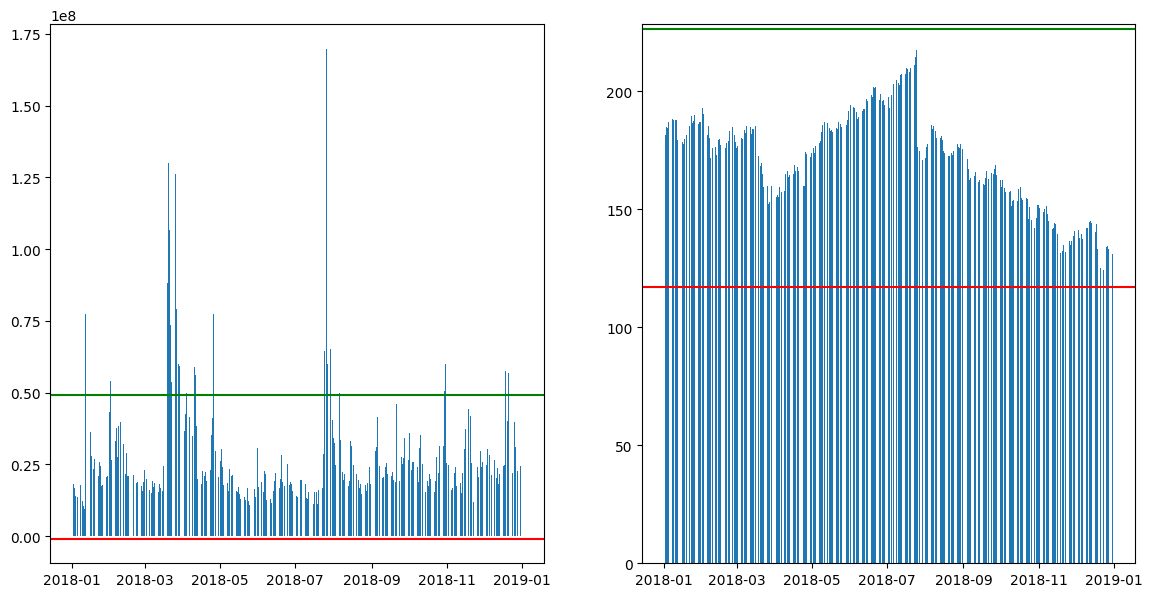

In [18]:
iqr_volume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
tukey_lower_volume = fb['volume'].quantile(0.25) - 1.5 * iqr_volume
tukey_upper_volume = fb['volume'].quantile(0.75) + 1.5 * iqr_volume

iqr_close = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)
tukey_lower_close = fb['close'].quantile(0.25) - 1.5 * iqr_close
tukey_upper_close = fb['close'].quantile(0.75) + 1.5 * iqr_close

fig, ax = plt.subplots(1,2, figsize = (14, 7))

ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukey_lower_volume, color='r')
ax[0].axhline(tukey_upper_volume, color='g')

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukey_lower_close, color='r')
ax[1].axhline(tukey_upper_close, color='g')

Fill in the area between the bounds in the plot from exercise #2.

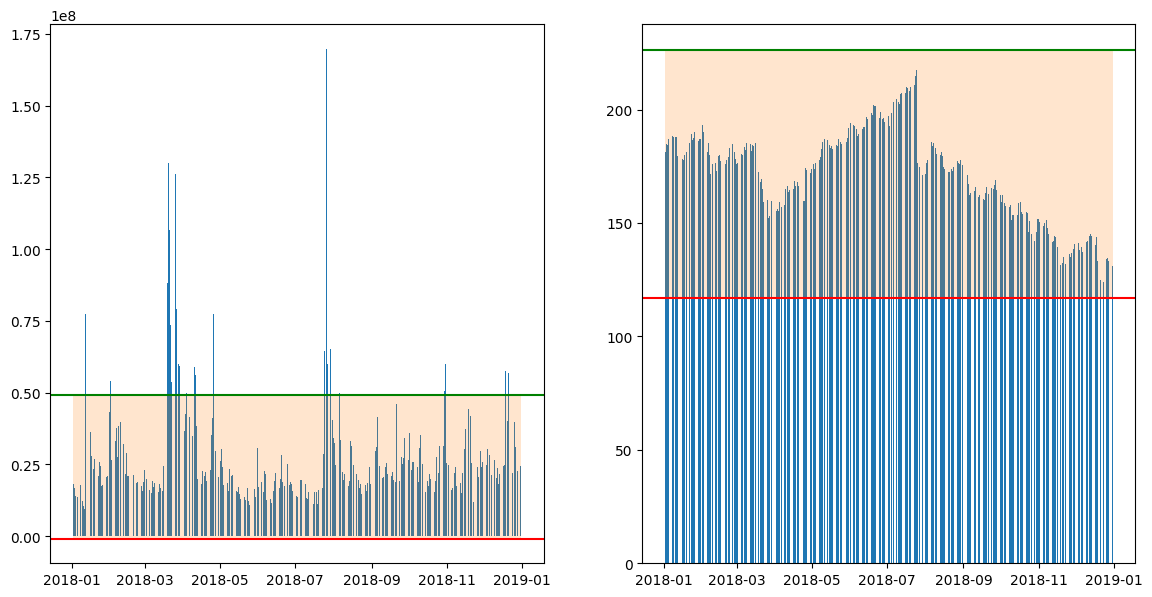

In [20]:
iqr_volume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
tukey_lower_volume = fb['volume'].quantile(0.25) - 1.5 * iqr_volume
tukey_upper_volume = fb['volume'].quantile(0.75) + 1.5 * iqr_volume

iqr_close = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)
tukey_lower_close = fb['close'].quantile(0.25) - 1.5 * iqr_close
tukey_upper_close = fb['close'].quantile(0.75) + 1.5 * iqr_close

fig, ax = plt.subplots(1,2, figsize = (14, 7))

ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukey_lower_volume, color='r')
ax[0].axhline(tukey_upper_volume, color='g')
ax[0].fill_between(fb.index, tukey_lower_volume, tukey_upper_volume, alpha = 0.2)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukey_lower_close, color='r')
ax[1].axhline(tukey_upper_close, color='g')
ax[1].fill_between(fb.index, tukey_lower_close, tukey_upper_close, alpha = 0.2)

Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

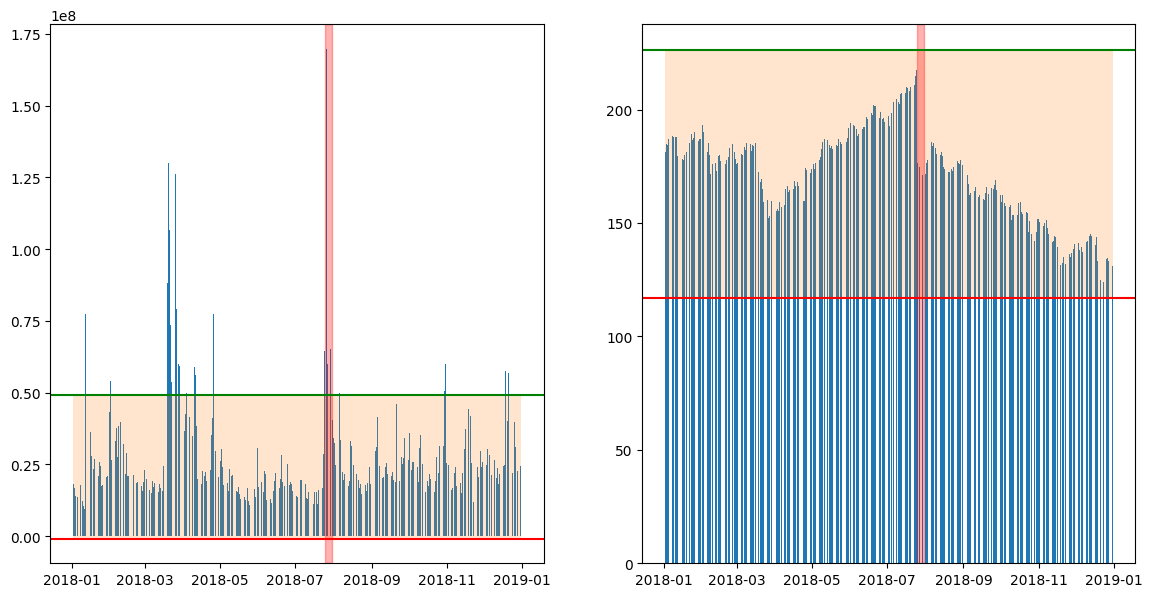

In [23]:
iqr_volume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
tukey_lower_volume = fb['volume'].quantile(0.25) - 1.5 * iqr_volume
tukey_upper_volume = fb['volume'].quantile(0.75) + 1.5 * iqr_volume

iqr_close = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)
tukey_lower_close = fb['close'].quantile(0.25) - 1.5 * iqr_close
tukey_upper_close = fb['close'].quantile(0.75) + 1.5 * iqr_close

fig, ax = plt.subplots(1,2, figsize = (14, 7))

ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukey_lower_volume, color='r')
ax[0].axhline(tukey_upper_volume, color='g')
ax[0].fill_between(fb.index, tukey_lower_volume, tukey_upper_volume, alpha = 0.2)
ax[0].axvspan('2018-07-25', '2018-07-31', color='r', alpha=0.3)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukey_lower_close, color='r')
ax[1].axhline(tukey_upper_close, color='g')
ax[1].fill_between(fb.index, tukey_lower_close, tukey_upper_close, alpha = 0.2)
ax[1].axvspan('2018-07-25', '2018-07-31', color='r', alpha=0.3)


Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

Text(17610.0, 168.15, 'FTC launches investigation')

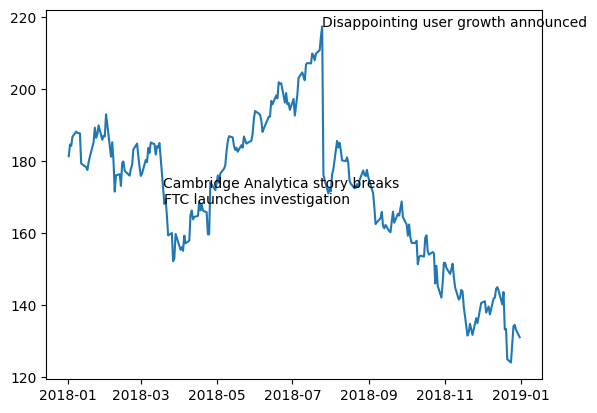

In [39]:
import matplotlib.dates as plt_date

plt.plot(fb.close)
plt.annotate('Disappointing user growth announced',
             xy=(plt_date.date2num(pd.to_datetime('2018-07-25')), fb.loc['2018-07-25', 'close']))
plt.annotate('Cambridge Analytica story breaks',
             xy=(plt_date.date2num(pd.to_datetime('2018-03-19')), fb.loc['2018-03-19', 'close']))
plt.annotate('FTC launches investigation',
             xy=(plt_date.date2num(pd.to_datetime('2018-03-20')), fb.loc['2018-03-20', 'close']))

Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [64]:
# related documentation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

import itertools

import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    colormap = plt.colormaps['Accent']

    for i, (x, y), axes in zip(
        range(permutation_count),
        itertools.permutations(data.columns, 2),
        ax,
    ):
        color = colormap(i % colormap.N)
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color = color)
    plt.close()
    return fig

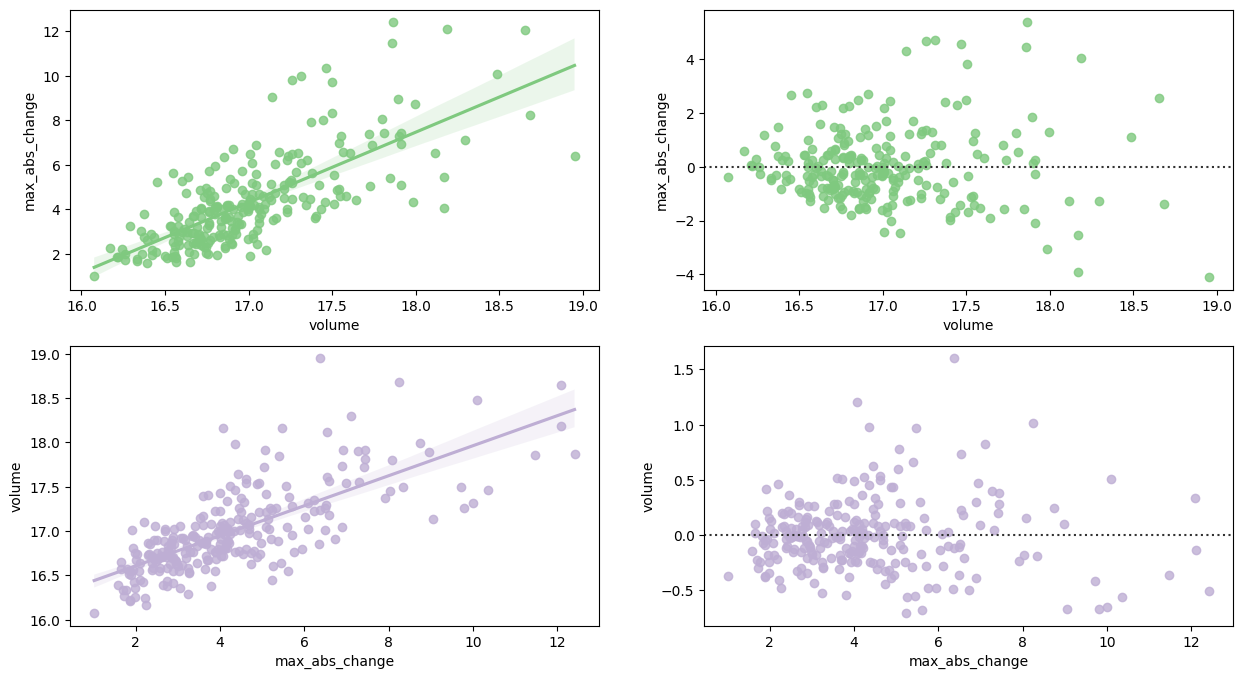

In [65]:
# using the code from 9.4 to test function
fb_reg_data = fb.assign(
  volume=np.log(fb.volume),
  max_abs_change=fb.high - fb.low
).iloc[:,-2:]

reg_resid_plots(fb_reg_data)

Summary:

  I have learned that an alternative to matplotlib and pandas is seaborn, which I found has more more intuitive way of making plots, but is also noticeably slower. Another important learning is that there are methods that would allow to annotate and highlight parts of the data, and knowing them is useful especially when we are presenting the data